In [1]:
import pandas as pd

In [2]:
df=  pd.read_csv(r"D:\OneDrive - NITT\Custom_Download\traffic.csv")

In [9]:
# pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_r', 500)

In [ ]:
df[:2].T

In [3]:
df

,Month,Accidents with Damages,Accidents with Injuries,Fatal Accidents,Total Number of Accidents,Saturday,Sunday,Monday,Tuesday,Wednesday,...,illegal overtaking,Not adhering to the signal,Excessive speed,Driver under the influence of narcotics,other.1,total.3,Number of Injured,Number of Fatalities,Unharmed,Total People Involved in Accidents
0,01/1437,9308,244,85,9637,1544,1306,1230,1377,1355,...,898,1957,2613,47.0,2839,9637,430,105,13792,14327
1,02/1437,7495,256,90,7841,1254,1085,1006,1098,1045,...,488,441,2790,2.0,2782,7841,549,104,13221,13874
2,03/1437,7631,305,86,8022,1128,1098,1234,1105,987,...,406,243,2708,6.0,3178,8022,458,113,13637,14208
3,04/1437,8941,315,84,9340,1381,1246,1214,1288,1326,...,409,381,1719,3.0,5229,9340,497,102,15246,15845
4,05/1437,9600,255,82,9937,1555,1491,1237,1464,1136,...,570,873,1866,NaN,4530,9937,423,90,19848,20361
5,06/1437,8087,193,79,8359,1106,1323,1169,1183,1103,...,228,1565,4,18.0,5542,8359,391,102,13564,14057
6,07/1437,8142,223,66,8431,1354,1181,1143,902,1116,...,427,211,1665,3.0,4217,8431,369,85,14106,14560
7,08/1437,10008,178,62,10248,1419,1732,1041,1567,1448,...,1128,273,1757,3.0,4662,10248,379,77,20414,20870
8,09/1437,5332,150,74,5556,696,817,970,824,600,...,278,359,1585,3.0,2180,5556,290,84,13114,13488
9,10/1437,8139,151,69,8359,1106,1464,991,1007,1182,...,477,195,1565,2.0,4281,8359,335,88,17927,18350


In [29]:
df


# Accidents with Damages

y = df['Accidents with Damages']
X = df.drop('Accidents with Damages',axis=1)

In [30]:
cols = ['Fatal Accidents' ,'Total Number of Accidents','Month']

In [31]:
X.drop(cols,axis=1,inplace=True)

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
col_names = list(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [37]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [40]:
X_train = pd.DataFrame(X_train,columns=col_names)
X_test = pd.DataFrame(X_test,columns=col_names)

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
reg = RandomForestRegressor(random_state=42)

In [44]:
reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [45]:
y_pred = reg.predict(X_test)

In [46]:
y_pred

array([1790.96, 6218.47, 6321.98, 1896.4 , 6534.04, 2013.4 , 7754.36,
       6529.27])

In [47]:
reg.feature_importances_

array([2.43542924e-03, 5.27962684e-02, 1.63361242e-02, 1.14983276e-02,
       1.81546833e-02, 1.42497932e-02, 3.54439904e-02, 2.85539681e-02,
       1.74942946e-02, 2.66642650e-02, 1.91546104e-03, 4.51572251e-02,
       2.31539403e-02, 8.47418149e-03, 2.71358372e-02, 2.11375168e-02,
       1.01734956e-02, 1.44649576e-02, 7.44261302e-03, 3.25639701e-02,
       1.51521385e-02, 6.07125072e-05, 8.55057043e-03, 1.44858129e-02,
       3.68422292e-04, 2.38678189e-02, 3.73202389e-03, 7.50838321e-03,
       2.28560734e-02, 5.33190853e-05, 1.56738223e-02, 3.17922971e-02,
       3.83853387e-04, 2.56621346e-02, 7.62332152e-03, 7.73527399e-03,
       8.09930178e-03, 4.13792350e-03, 1.00118716e-02, 1.37891397e-02,
       2.17372074e-02, 9.29997211e-05, 3.93526961e-02, 1.95946121e-02,
       3.97084649e-05, 6.15060498e-03, 8.70971993e-03, 1.16614595e-02,
       2.52597628e-02, 3.75787060e-04, 2.34302425e-02, 3.64537269e-04,
       3.87688926e-04, 4.92001604e-04, 7.91862885e-03, 8.40525345e-03,
      

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [49]:
mean_squared_error(y_test,y_pred)

84992.04587500008

In [51]:
X_train.shape

(28, 69)

Elapsed time to compute the importances: 9.191 seconds


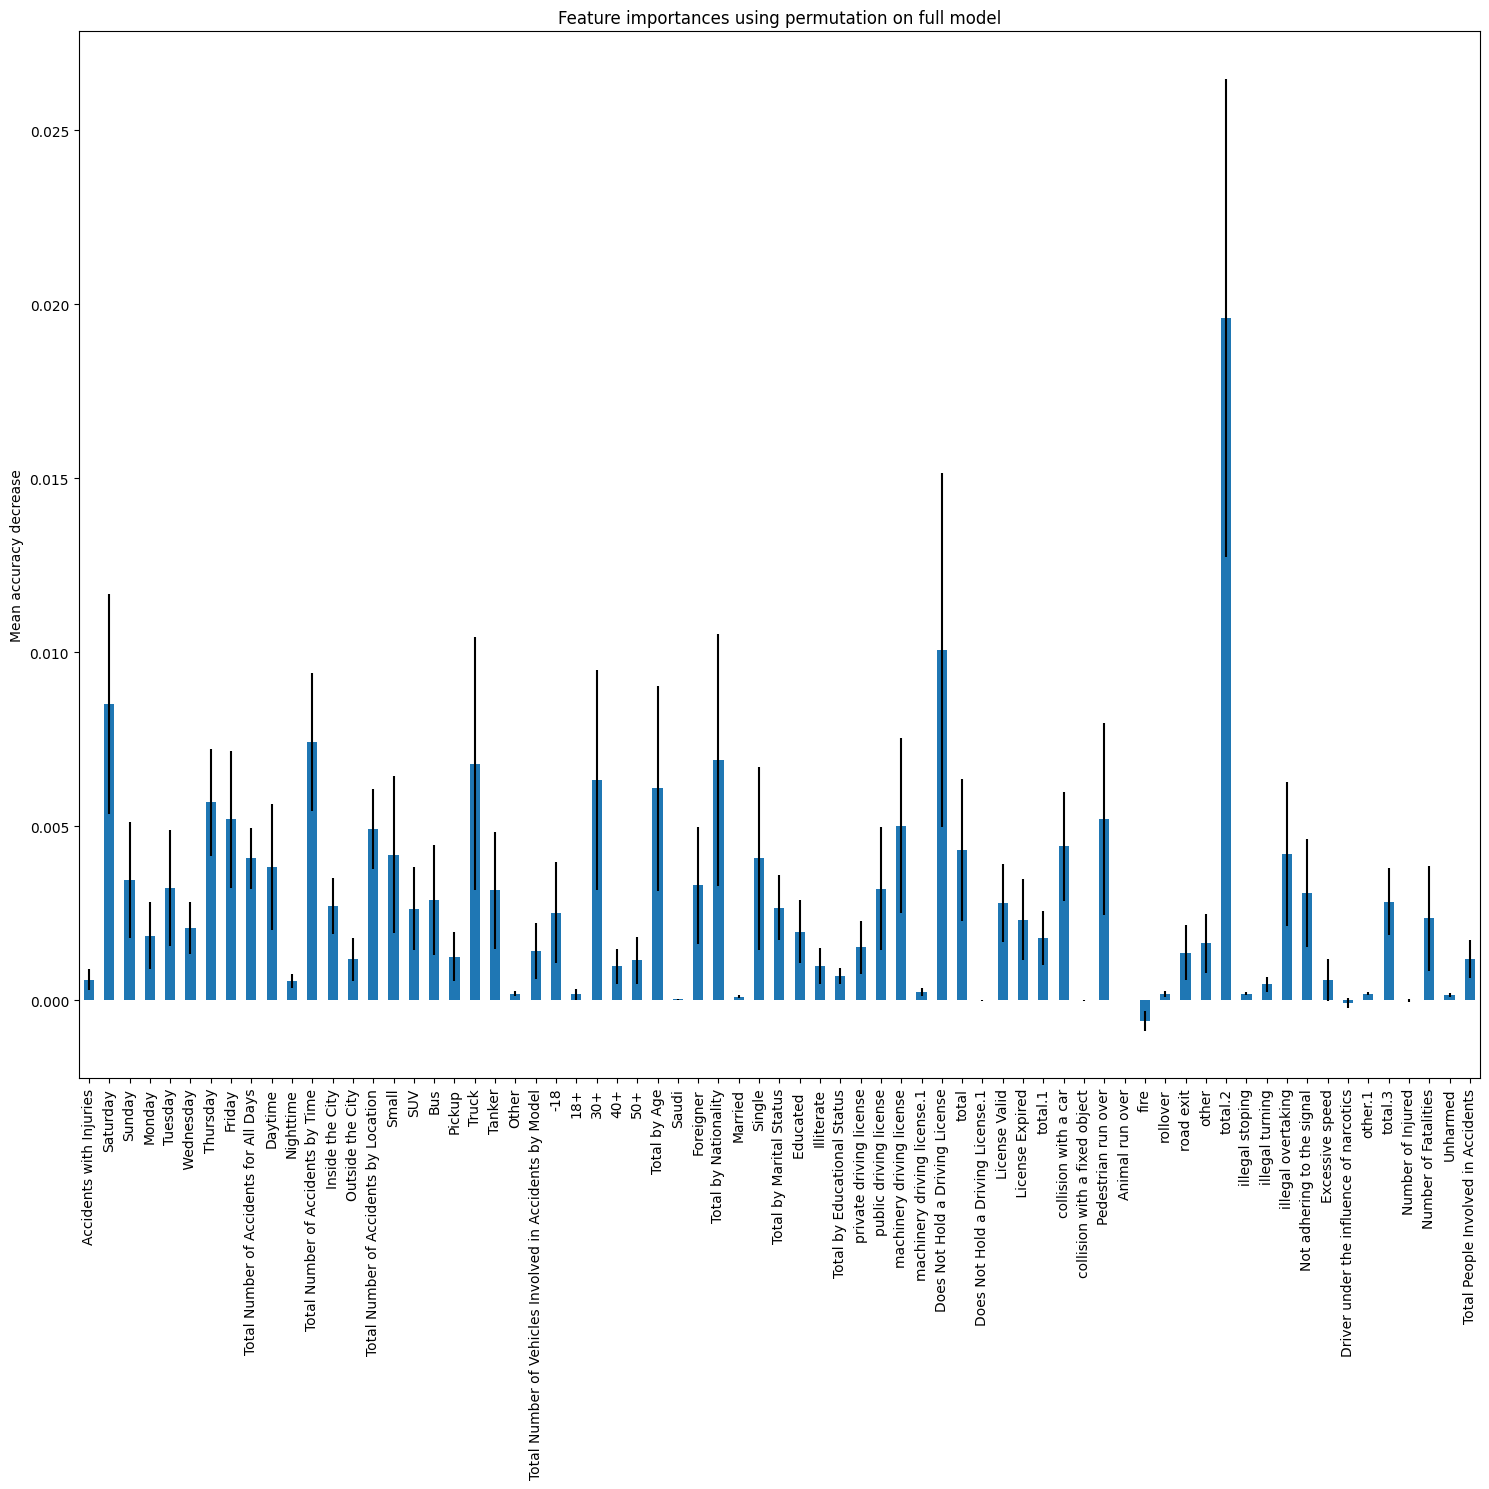

In [58]:
from sklearn.inspection import permutation_importance
import time
import matplotlib.pyplot as plt

start_time = time.time()
result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=col_names)

fig, ax = plt.subplots(figsize=(15, 15))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()